In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("Data/Data/Real-Data/Real_Combine.csv")

In [3]:
df.shape

(1093, 9)

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [8]:
df.shape

(1092, 9)

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
import xgboost as xgb

In [12]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
regressor.score(X_train, y_train)

0.9997717196147036

In [14]:
regressor.score(X_test, y_test)

0.8123312956923813

In [15]:
from sklearn.model_selection import cross_val_score


In [19]:
score = cross_val_score(regressor, X,y,cv=5)
score

array([0.5202408 , 0.2933518 , 0.81301019, 0.9997314 , 0.9993042 ])

In [20]:
score.mean()

0.725127678258157

In [21]:
prediction=regressor.predict(X_test)

/home/kundan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

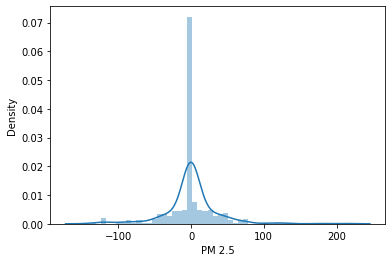

In [23]:
sns.distplot(prediction - y_test)

In [26]:
y_test.shape

(328,)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

In [32]:
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Level of trees
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Subsample ratio of the training instances. 
# Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. 
# and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
subsample = [0.7, 0.6, 0.8]
# Min child weight params
min_child_weight = [3,4,5,6,7]

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [40]:
xg_random = RandomizedSearchCV(estimator=regressor, 
                               param_distributions=random_grid, 
                               scoring="neg_mean_squared_error", 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [42]:
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [43]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [45]:
xg_random.best_score_

-1380.5446667169047

In [46]:
predictions=xg_random.predict(X_test)

/home/kundan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

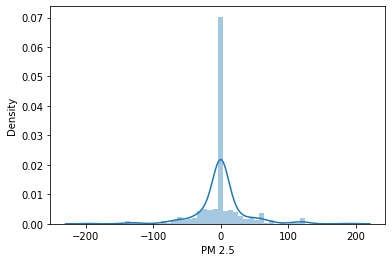

In [47]:
sns.distplot(y_test-predictions)

In [48]:
from sklearn import metrics

In [52]:
print("Mean Absolute Error:\t", metrics.mean_absolute_error(y_test, prediction))
print("R2 Score:\t", metrics.r2_score(y_test, prediction))
print("Mean Squared Error:\t", metrics.mean_squared_error(y_test, prediction))
print("Root Mean Squared Error:\t", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error:	 19.580280400079683
R2 Score:	 0.8123312956923813
Mean Squared Error:	 1344.4213246754996
Root Mean Squared Error:	 36.66635139573475


In [53]:
import pickle
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xg_random, f)

In [ ]:
xg.random()